<a href="https://colab.research.google.com/github/quannguyen2704/bt-mtcnn-cnn/blob/main/bt_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

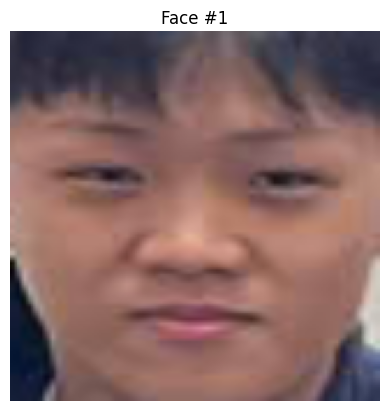

KeyboardInterrupt: Interrupted by user

In [ ]:
from mtcnn import MTCNN
import cv2
import os
import matplotlib.pyplot as plt

# ƒê∆∞·ªùng d·∫´n ·∫£nh nh√≥m
image_path = '/content/anh nhom.jpg'
output_dir = '/content/data_faces'
os.makedirs(output_dir, exist_ok=True)

# ƒê·ªçc ·∫£nh & ph√°t hi·ªán khu√¥n m·∫∑t
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(img)

# V·∫Ω v√† l∆∞u khu√¥n m·∫∑t
for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))

    # Hi·ªÉn th·ªã khu√¥n m·∫∑t
    plt.imshow(face_crop)
    plt.axis('off')
    plt.title(f'Face #{i+1}')
    plt.show()

    # G√°n t√™n th·ªß c√¥ng
    name = input(f" Nh·∫≠p t√™n cho khu√¥n m·∫∑t #{i+1} (vd: nhan, quan...): ").strip().lower()
    save_path = os.path.join(output_dir, f"{name}.jpg")

    if os.path.exists(save_path):
        print(f" ƒê√£ t·ªìn t·∫°i: {save_path}, b·ªè qua...")
        continue

    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
    print(f"‚úÖ ƒê√£ l∆∞u v√†o {save_path}")
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob

# Load data t·ª´ th∆∞ m·ª•c /content/data_faces
def load_data(data_dir):
    X, y = [], []
    label_map = {}
    i = 0
    for img_path in glob(f"{data_dir}/*.jpg"):
        label = os.path.basename(img_path).split('.')[0]
        if label not in label_map:
            label_map[label] = i
            i += 1
        img = cv2.resize(cv2.imread(img_path), (160, 160))
        X.append(img / 255.0)
        y.append(label_map[label])
    return np.array(X), np.array(y), label_map

X, y, label_map = load_data('/content/data_faces')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(160,160,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
def predict_face(image_path):
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    for face in faces:
        x, y, w, h = face['box']
        x, y = max(0, x), max(0, y)
        face_crop = img[y:y+h, x:x+w]
        face_crop = cv2.resize(face_crop, (160, 160))
        face_norm = face_crop / 255.0
        face_input = np.expand_dims(face_norm, axis=0)

        pred = model.predict(face_input)[0]
        label_idx = np.argmax(pred)
        label_name = [k for k, v in label_map.items() if v == label_idx][0]

        print(f"üîç D·ª± ƒëo√°n: {label_name} ({round(pred[label_idx]*100, 2)}%)")

        # V·∫Ω k·∫øt qu·∫£
        plt.imshow(face_crop)
        plt.title(f"Predicted: {label_name}")
        plt.axis('off')
        plt.show()

# V√≠ d·ª• d√πng
predict_face('/content/data/quan.jpg')  # ·∫£nh m·ªõi c·ªßa m·ªôt ng∆∞·ªùi trong nh√≥m


In [ ]:
# 1. Import th∆∞ vi·ªán
from mtcnn import MTCNN
import cv2
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 2. T·∫°o th∆∞ m·ª•c l∆∞u khu√¥n m·∫∑t
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

# 3. C·∫Øt v√† l∆∞u khu√¥n m·∫∑t t·ª´ ·∫£nh nh√≥m
filename = "/content/anh nhom.jpg"
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(image)

# Danh s√°ch t√™n c·ªë ƒë·ªãnh theo th·ª© t·ª± khu√¥n m·∫∑t
names = ['nhan', 'trieu', 'quan', 'lamanh', 'tuan']

for i, face in enumerate(faces):
    if i >= len(names):
        break  # D·ª´ng n·∫øu s·ªë m·∫∑t nhi·ªÅu h∆°n s·ªë t√™n

    name = names[i]
    save_path = os.path.join(output_dir, f"{name}.jpg")

    if os.path.exists(save_path):
        continue  # Kh√¥ng l∆∞u l·∫°i n·∫øu ƒë√£ t·ªìn t·∫°i

    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

# 4. Load d·ªØ li·ªáu khu√¥n m·∫∑t
X, y, label_map = [], [], {}
for i, filename in enumerate(os.listdir(output_dir)):
    if filename.endswith(".jpg"):
        path = os.path.join(output_dir, filename)
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        X.append(img)

        name = filename.split(".")[0]
        if name not in label_map:
            label_map[name] = len(label_map)
        y.append(label_map[name])

X = np.array(X)
y = np.array(y)

# 5. Chia t·∫≠p train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(label_map))
y_test = to_categorical(y_test, num_classes=len(label_map))

# 6. T·∫°o m√¥ h√¨nh CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_map), activation='softmax'),
    Dropout(0.25)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

# 7. D·ª± ƒëo√°n ·∫£nh khu√¥n m·∫∑t m·ªõi
# 7. D·ª± ƒëo√°n v√† in khu√¥n m·∫∑t t·ª´ ·∫£nh m·ªõi
import matplotlib.pyplot as plt

test_img_path = "/content/quan.jpg"
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    resized_face = cv2.resize(face_crop, (160, 160))

    # Chu·∫©n h√≥a v√† reshape cho m√¥ h√¨nh
    face_input = resized_face.astype('float32') / 255.0
    face_input = np.expand_dims(face_input, axis=0)

    # D·ª± ƒëo√°n
    prediction = model.predict(face_input)
    predicted_label = np.argmax(prediction)
    predicted_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]

    # In k·∫øt qu·∫£
    plt.imshow(resized_face)
    plt.axis('off')
    plt.title(f" Du doan: {predicted_name}")
    plt.show()


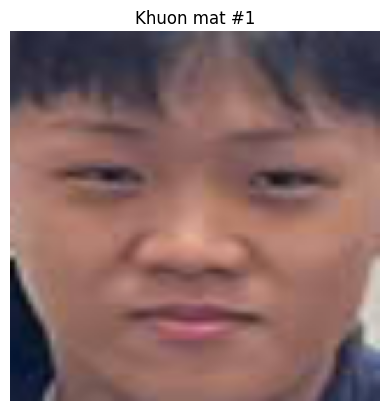

KeyboardInterrupt: Interrupted by user

In [ ]:
# 1. Import th∆∞ vi·ªán
from mtcnn import MTCNN
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 2. T·∫°o th∆∞ m·ª•c l∆∞u khu√¥n m·∫∑t
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

# 3. C·∫Øt v√† l∆∞u khu√¥n m·∫∑t t·ª´ ·∫£nh nh√≥m
filename = "/content/anh nhom.jpg"
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(image)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))

    plt.imshow(face_crop)
    plt.axis('off')
    plt.title(f"Khuon mat #{i+1}")
    plt.show()

    name = input(f"‚ú® Nhap ten cho khuon mat #{i+1} (VD: lamanh): ").strip().lower().replace(" ", "_")
    save_path = os.path.join(output_dir, f"{name}.jpg")

    if os.path.exists(save_path):
        print(f"‚ö†Ô∏è File {save_path} da ton tai, bo qua")
        continue

    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
    print(f"‚úÖ Da luu khuon mat: {save_path}")

# 4. Load d·ªØ li·ªáu khu√¥n m·∫∑t
X = []
y = []
label_map = {}
for i, filename in enumerate(os.listdir(output_dir)):
    if filename.endswith(".jpg"):
        path = os.path.join(output_dir, filename)
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        X.append(img)
        name = filename.split(".")[0]
        if name not in label_map:
            label_map[name] = len(label_map)
        y.append(label_map[name])

X = np.array(X)
y = np.array(y)

# 5. Chia t·∫≠p train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(label_map))
y_test = to_categorical(y_test, num_classes=len(label_map))

# 6. T·∫°o m√¥ h√¨nh CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))
model.add(Dropout(0.25))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

# 7. D·ª± ƒëo√°n ·∫£nh khu√¥n m·∫∑t m·ªõi
# T·∫£i ·∫£nh m·ªõi
test_img_path = "/content/quan.jpg"  # Thay b·∫±ng ·∫£nh b·∫°n mu·ªën test
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    face_crop = face_crop.astype('float32') / 255.0
    face_crop = np.expand_dims(face_crop, axis=0)

    prediction = model.predict(face_crop)
    predicted_label = np.argmax(prediction)
    predicted_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]

    print(f"üì∏ Khuon mat #{i+1} trong anh test du doan la: {predicted_name}")


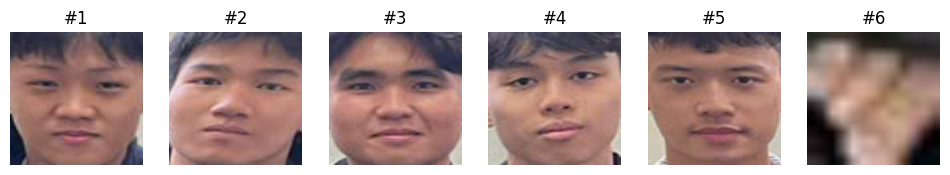

KeyboardInterrupt: Interrupted by user

In [ ]:
# 1. Import thu vien
from mtcnn import MTCNN
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 2. Tao thu muc luu khuon mat
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

# 3. Cat va luu khuon mat tu anh nhom
filename = "/content/anh nhom.jpg"
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(image)

# Hien tat ca khuon mat truoc khi gan ten
plt.figure(figsize=(12, 6))
for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face_crop)
    plt.title(f'#{i+1}')
    plt.axis('off')
plt.show()

# Nhap ten theo thu tu khuon mat
names = input("üëâ Nhap ten cho cac khuon mat theo thu tu, cach nhau boi dau phay (VD: lamanh,trieu,quan,nhan,tuan): ")
names = [n.strip().lower().replace(" ", "_") for n in names.split(",")]

# Luu khuon mat voi ten tuong ung
for i, face in enumerate(faces):
    if i >= len(names):
        break
    name = names[i]
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    save_path = os.path.join(output_dir, f"{name}.jpg")
    if os.path.exists(save_path):
        print(f"‚ö†Ô∏è File {save_path} da ton tai, bo qua")
        continue
    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
    print(f"‚úÖ Da luu khuon mat: {save_path}")

# 4. Load du lieu khuon mat
X = []
y = []
label_map = {}
for i, filename in enumerate(os.listdir(output_dir)):
    if filename.endswith(".jpg"):
        path = os.path.join(output_dir, filename)
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        X.append(img)
        name = filename.split(".")[0]
        if name not in label_map:
            label_map[name] = len(label_map)
        y.append(label_map[name])

X = np.array(X)
y = np.array(y)

# 5. Chia tap train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(label_map))
y_test = to_categorical(y_test, num_classes=len(label_map))

# 6. Tao mo hinh CNN\model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))
model.add(Dropout(0.25))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

# 7. Du doan anh khuon mat moi
test_img_path = "/content/quan.jpg"  # Anh test
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    face_crop = face_crop.astype('float32') / 255.0
    face_crop = np.expand_dims(face_crop, axis=0)

    prediction = model.predict(face_crop)
    predicted_label = np.argmax(prediction)
    predicted_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]
 # In k·∫øt qu·∫£
    plt.imshow(resized_face)
    plt.axis('off')
    plt.title(f"üí° Du doan: {predicted_name}")
    plt.show()


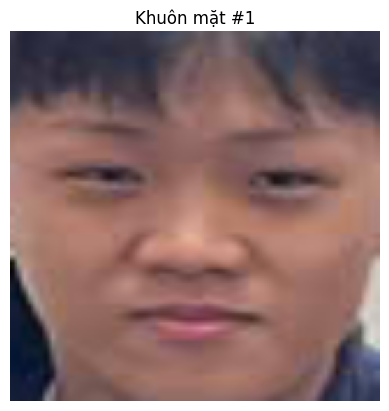

‚úÖ ƒê√£ l∆∞u khu√¥n m·∫∑t: /content/data/face_1.jpg


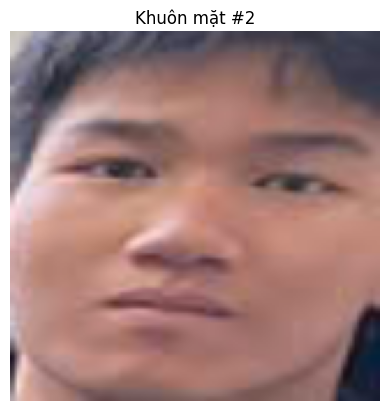

‚úÖ ƒê√£ l∆∞u khu√¥n m·∫∑t: /content/data/face_2.jpg


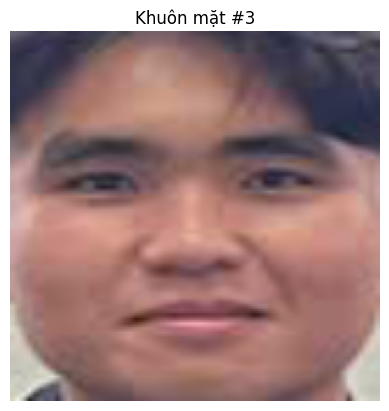

‚úÖ ƒê√£ l∆∞u khu√¥n m·∫∑t: /content/data/face_3.jpg


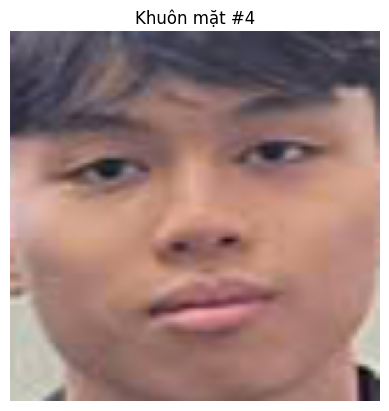

‚úÖ ƒê√£ l∆∞u khu√¥n m·∫∑t: /content/data/face_4.jpg


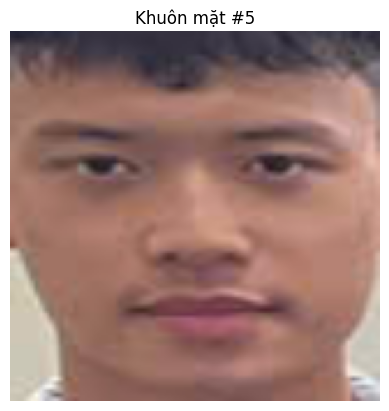

‚ö†Ô∏è File /content/data/face_5.jpg ƒë√£ t·ªìn t·∫°i, b·ªè qua


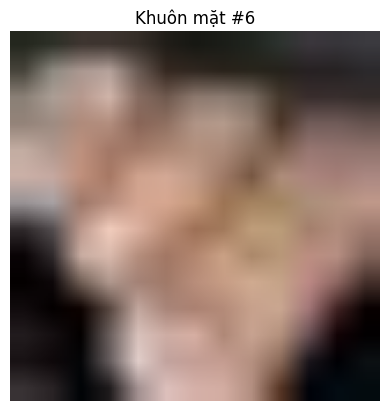

‚ö†Ô∏è File /content/data/face_6.jpg ƒë√£ t·ªìn t·∫°i, b·ªè qua
Epoch 1/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4s/step - accuracy: 0.1250 - loss: 3.8602 - val_accuracy: 0.0000e+00 - val_loss: 5.0362
Epoch 2/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step - accuracy: 0.0000e+00 - loss: 6.0050 - val_accuracy: 0.0000e+00 - val_loss: 4.1107
Epoch 3/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 957ms/step - accuracy: 0.1250 - loss: 5.7039 - val_accuracy: 0.0000e+00 - val_loss: 3.3953
Epoch 4/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 981ms/step - accuracy: 0.3750 - loss: 5.2512 - val_accuracy: 0.0000e+00 - val_loss: 3.3207
Epoch 5/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 941ms/step - accuracy: 0.1250 - loss: 7.2082 - val_accuracy: 0.0000e+00 - val_loss: 3.6144
Epoch 6/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 949ms/ste

In [ ]:
# 1. Import th∆∞ vi·ªán
from mtcnn import MTCNN
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 2. T·∫°o th∆∞ m·ª•c l∆∞u khu√¥n m·∫∑t
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

# 3. C·∫Øt v√† l∆∞u khu√¥n m·∫∑t t·ª´ ·∫£nh nh√≥m
filename = "/content/anh nhom.jpg"
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(image)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))

    plt.imshow(face_crop)
    plt.axis('off')
    plt.title(f"Khu√¥n m·∫∑t #{i+1}")
    plt.show()

    name = f"face_{i+1}"
    save_path = os.path.join(output_dir, f"{name}.jpg")

    if os.path.exists(save_path):
        print(f"‚ö†Ô∏è File {save_path} ƒë√£ t·ªìn t·∫°i, b·ªè qua")
        continue

    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
    print(f"‚úÖ ƒê√£ l∆∞u khu√¥n m·∫∑t: {save_path}")

# 4. Load d·ªØ li·ªáu khu√¥n m·∫∑t
X, y = [], []
label_map = {}
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):
        path = os.path.join(output_dir, filename)
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        X.append(img)
        name = filename.split(".")[0]
        if name not in label_map:
            label_map[name] = len(label_map)
        y.append(label_map[name])

X = np.array(X)
y = np.array(y)

# 5. Chia t·∫≠p train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(label_map))
y_test = to_categorical(y_test, num_classes=len(label_map))

# 6. T·∫°o m√¥ h√¨nh CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))
model.add(Dropout(0.25))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

# 7. D·ª± ƒëo√°n ·∫£nh khu√¥n m·∫∑t m·ªõi
test_img_path = "/content/quan.jpg"  # Thay b·∫±ng ·∫£nh b·∫°n mu·ªën test
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    face_crop = face_crop.astype('float32') / 255.0
    face_crop = np.expand_dims(face_crop, axis=0)

    prediction = model.predict(face_crop)
    predicted_label = np.argmax(prediction)
    predicted_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]

    print(f"üì∏ Khu√¥n m·∫∑t #{i+1} trong ·∫£nh test ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: {predicted_name}")


In [ ]:
# 1. Import th∆∞ vi·ªán
from mtcnn import MTCNN
import cv2
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 2. T·∫°o th∆∞ m·ª•c l∆∞u khu√¥n m·∫∑t
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

# 3. C·∫Øt v√† l∆∞u khu√¥n m·∫∑t t·ª´ ·∫£nh nh√≥m (kh√¥ng in, kh√¥ng h·ªèi, ghi ƒë√®)
filename = "/content/anh nhom.jpg"
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(image)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = image[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))

    name = f"face_{i+1}"
    save_path = os.path.join(output_dir, f"{name}.jpg")

    # üü¢ Ghi ƒë√® n·∫øu file ƒë√£ t·ªìn t·∫°i
    cv2.imwrite(save_path, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

# 4. Load d·ªØ li·ªáu khu√¥n m·∫∑t
X, y = [], []
label_map = {}
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):
        path = os.path.join(output_dir, filename)
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        X.append(img)
        name = filename.split(".")[0]
        if name not in label_map:
            label_map[name] = len(label_map)
        y.append(label_map[name])

X = np.array(X)
y = np.array(y)

# 5. Chia t·∫≠p train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(label_map))
y_test = to_categorical(y_test, num_classes=len(label_map))

# 6. T·∫°o m√¥ h√¨nh CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))
model.add(Dropout(0.25))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

# 7. D·ª± ƒëo√°n ·∫£nh khu√¥n m·∫∑t m·ªõi
test_img_path = "/content/quan.jpg"  # Thay b·∫±ng ·∫£nh b·∫°n mu·ªën test
img = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    face_crop = img[y:y+h, x:x+w]
    face_crop = cv2.resize(face_crop, (160, 160))
    face_crop = face_crop.astype('float32') / 255.0
    face_crop = np.expand_dims(face_crop, axis=0)

    prediction = model.predict(face_crop)
    predicted_label = np.argmax(prediction)
    predicted_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]

    print(f"üì∏ Khu√¥n m·∫∑t #{i+1} trong ·∫£nh test ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: {predicted_name}")


Epoch 1/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4s/step - accuracy: 0.1000 - loss: 6.4771 - val_accuracy: 0.0000e+00 - val_loss: 5.1877
Epoch 2/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step - accuracy: 0.1000 - loss: 8.7719 - val_accuracy: 0.0000e+00 - val_loss: 4.4668
Epoch 3/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step - accuracy: 0.1000 - loss: 6.5411 - val_accuracy: 0.0000e+00 - val_loss: 3.6701
Epoch 4/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step - accuracy: 0.2000 - loss: 6.3839 - val_accuracy: 0.0000e+00 - val_loss: 3.2500
Epoch 5/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step - accuracy: 0.1000 - loss: 6.5023 - val_accuracy: 0.0000e+00 - val_loss: 2.9741
Epoch 6/100
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step - accuracy: 0.2000 - loss: 4.9257 - val_accuracy: 0.0000e+00 - val_loss:

KeyboardInterrupt: 

In [ ]:
pip install mtcnn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 18.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 58.4 MB/s eta 0:00:00
